# Measuring Diversity

This notebook will lead you through a fairly simple analysis of real student demographic data from UC Berkeley. The data is fairly simple, and so we will be focusing on data manipulation and presentation.

A very simple question one might ask is how does the ethnic and gender makeup of an academic department compare to the makeup of Berkeley as a whole (or California, or the US...). Using data from Cal Answers, let's try and answer that question.

We have data going back to 2005 with gender and (coarse) ethnicity broken down by various academic units. A skeleton for comparing one department/unit to Berkeley has been created.

In groups, you'll need to:
- choose to look at gender, ethnicity or a combination across units,
- automate .csv loads from a folder,
- run the analysis for every department/group,
- make a summary plot(s).

As a reminder, IPython notebooks are organized by "cells." Each cell can have its own code and can be run independently and in any order (although they are usually run top to bottom in a notebook.) To run a cell and move to the next cell press ```Shift+Enter```. To run a cell and stay on that cell press ```Control+Enter```.


Questions to be discussed in groups are highlighted in <font color='green'>green</font>. If you don't understand a function that is used, try googling something like "python function-name".

## Homework
Your homework will be to post a picture of your results on Piazza along with a brief description of the analysis you have done. You might also comment on the implications of your analysis on diversity, equity, etc.

In [2]:
import os # library that deals with operating system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Loading data

In [72]:
folder = 'data'
filename = 'CensusEquityComparisonData-LettersAndSciences.csv'
baseline = 'CensusEquityComparisonData-CampusTotal.csv'
df = pd.read_csv(os.path.join(folder, filename))
df_baseline = pd.read_csv(os.path.join(folder, baseline))

## Inspect the data

In [73]:
cols = df.columns
print(cols)
df

Index([u'﻿Semester Year Name Concat', u'Semester Year Letter Cd Concat',
       u'Ungrad Grad Cd', u'Gender Desc', u'Ucb Level1 Ethnic Rollup Cd',
       u'Ucb Level1 Ethnic Rollup Desc', u'Student Headcount',
       u'Prorated Student Major Cnt Sum'],
      dtype='object')


,﻿Semester Year Name Concat,Semester Year Letter Cd Concat,Ungrad Grad Cd,Gender Desc,Ucb Level1 Ethnic Rollup Cd,Ucb Level1 Ethnic Rollup Desc,Student Headcount,Prorated Student Major Cnt Sum
0,2005 Fall,2005 D,U,Female,1,Underrepresented Minority,1818,1815.500000
1,2005 Fall,2005 D,U,Female,2,Asian/Pacific Islander,4172,4127.000000
2,2005 Fall,2005 D,U,Female,3,White/Other,4255,4240.166667
3,2005 Fall,2005 D,U,Female,4,International,176,173.500000
4,2005 Fall,2005 D,U,Male,1,Underrepresented Minority,1082,1080.000000
5,2005 Fall,2005 D,U,Male,2,Asian/Pacific Islander,2658,2616.666667
6,2005 Fall,2005 D,U,Male,3,White/Other,3355,3339.666667
7,2005 Fall,2005 D,U,Male,4,International,189,186.000000
8,2006 Spring,2006 B,U,Female,1,Underrepresented Minority,1755,1752.000000
9,2006 Spring,2006 B,U,Female,2,Asian/Pacific Islander,4164,4116.000000


In [10]:
semesters = df[cols[1]]

In [11]:
print(semesters)

0      2005 D
1      2005 D
2      2005 D
3      2005 D
4      2005 D
5      2005 D
6      2005 D
7      2005 D
8      2006 B
9      2006 B
10     2006 B
11     2006 B
12     2006 B
13     2006 B
14     2006 B
15     2006 B
16     2006 D
17     2006 D
18     2006 D
19     2006 D
20     2006 D
21     2006 D
22     2006 D
23     2006 D
24     2007 B
25     2007 B
26     2007 B
27     2007 B
28     2007 B
29     2007 B
        ...  
131    2013 D
132    2013 D
133    2013 D
134    2013 D
135    2013 D
136    2013 D
137    2014 B
138    2014 B
139    2014 B
140    2014 B
141    2014 B
142    2014 B
143    2014 B
144    2014 B
145    2014 D
146    2014 D
147    2014 D
148    2014 D
149    2014 D
150    2014 D
151    2014 D
152    2014 D
153    2015 B
154    2015 B
155    2015 B
156    2015 B
157    2015 B
158    2015 B
159    2015 B
160    2015 B
Name: Semester Year Letter Cd Concat, dtype: object


In [12]:
semesters = set(semesters)

In [13]:
print(semesters)

set(['2014 B', '2010 D', '2010 B', '2014 D', '2013 D', '2005 D', '2008 B', '2008 D', '2013 B', '2012 D', '2006 D', '2009 B', '2006 B', '2009 D', '2012 B', '2015 B', '2011 D', '2007 D', '2011 B', '2007 B'])


In [14]:
semesters = list(semesters)

In [15]:
print(semesters)

['2014 B', '2010 D', '2010 B', '2014 D', '2013 D', '2005 D', '2008 B', '2008 D', '2013 B', '2012 D', '2006 D', '2009 B', '2006 B', '2009 D', '2012 B', '2015 B', '2011 D', '2007 D', '2011 B', '2007 B']


In [16]:
semesters = sorted(semesters)

In [17]:
print(semesters)

['2005 D', '2006 B', '2006 D', '2007 B', '2007 D', '2008 B', '2008 D', '2009 B', '2009 D', '2010 B', '2010 D', '2011 B', '2011 D', '2012 B', '2012 D', '2013 B', '2013 D', '2014 B', '2014 D', '2015 B']


In [18]:
semesters

['2005 D',
 '2006 B',
 '2006 D',
 '2007 B',
 '2007 D',
 '2008 B',
 '2008 D',
 '2009 B',
 '2009 D',
 '2010 B',
 '2010 D',
 '2011 B',
 '2011 D',
 '2012 B',
 '2012 D',
 '2013 B',
 '2013 D',
 '2014 B',
 '2014 D',
 '2015 B']

In [27]:
print(cols)

Index([u'﻿Semester Year Name Concat', u'Semester Year Letter Cd Concat',
       u'Ungrad Grad Cd', u'Gender Desc', u'Ucb Level1 Ethnic Rollup Cd',
       u'Ucb Level1 Ethnic Rollup Desc', u'Student Headcount',
       u'Prorated Student Major Cnt Sum'],
      dtype='object')


<font color='green'>
1) What does each line above do to 'semesters'?<br>
You can run them individually and print semesters between lines.</font>

In [19]:
genders = list(set(df[cols[3]]))

In [20]:
print(genders)

['Male', 'Decline to State', 'Female']


# Example Analysis
We'll first look at how the college of Letters and Sciences compares to the campus as a whole. We'll restrict this analysis to gender for now.

In [28]:
def headcount_percent(df, semester, col, attrs):
    """
    Extract fractional headcount data for specific attributes from a column.
    
    Parameters
    ----------
    df : dataframe
        Dataframe containing data.
    semester : str
        String for semester
    col : str
        Column to check attributes from.
    attrs : list of str
        List of attributes to select and count.
        
    Return
    ------
    Array of percentages for each attribute in attrs.
    """
    indxs = []
    # What does this loop do?
    for attr in attrs:
        indxs.append((df[col] == attr) & (df['Semester Year Letter Cd Concat'] == semester))
        print(indxs)
    counts = [df['Student Headcount'].loc[indx].sum() for indx in indxs]
    total = sum(counts)
    return 100.*np.array([float(count)/total for count in counts])

def distance(data, baseline):
    """
    Compute the euclidean distance between two data arrays.
    
    Parameters
    ----------
    data : array
        Array of data.
    baseline : array
        Array of baseline data, should be the same shape as data.
        
    Return
    ------
    Euclidean distance between the arrays.
    """
    return np.linalg.norm(data-baseline)

campus_vs_LS = {} # dictionary for data
for semester in semesters:
    data = headcount_percent(df, semester, cols[3], genders)
    baseline = headcount_percent(df_baseline, semester, cols[3], genders)
    campus_vs_LS[semester] = distance(data, baseline)

[0      False
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
dtype: bool]
[0      False
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     Fal

In [29]:
campus_vs_LS

{'2005 D': 7.1203865037604714,
 '2006 B': 6.9378381207339306,
 '2006 D': 6.945581379989358,
 '2007 B': 6.70368653599499,
 '2007 D': 6.7788019339261192,
 '2008 B': 6.3815736826681748,
 '2008 D': 6.5747191694618952,
 '2009 B': 6.5805625184672962,
 '2009 D': 6.3591309229414987,
 '2010 B': 6.1700249277341621,
 '2010 D': 6.53165567501825,
 '2011 B': 6.3822790599993944,
 '2011 D': 6.6063294200467935,
 '2012 B': 6.3836498957019918,
 '2012 D': 6.6875518146062802,
 '2013 B': 6.1893758765201685,
 '2013 D': 6.3318584106410851,
 '2014 B': 6.2556576760027927,
 '2014 D': 5.4440943758518072,
 '2015 B': 5.427890171604866}

<font color='green'>
Read through the functions ```headcount_frac``` and ```distance```.<br>
1) What do they do?<br>
2) How are they documented?<br>
3) Is this the most reasonable way to calculate distance given our question? What drawbacks does it have?
</font>

## Plotting the Results

In [24]:
labels = sorted(campus_vs_LS.keys())
vals = [campus_vs_LS[key] for key in labels]
ticks = range(len(labels))

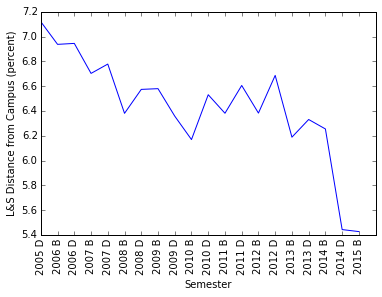

In [25]:
plt.plot(vals)
plt.ylabel('L&S Distance from Campus (percent)')
plt.xlabel('Semester')
p = plt.xticks(ticks, labels, rotation='vertical')

<font color='green'>
1) What does this plot show?<br>
2) How could this plot be improved?<br>
</font>

In [ ]:
1) Plot shows 

# Your Analysis
In your group, choose a question you'd like to investigate. The data comes from a number of academic units and is broken down by semester, gender, and ethnicity. You may have to restrict the scope of your question given the limitations of the dataset (you'll have access to more data for final projects!)

The rest of the notebook is broken down into the probable steps you'll need to take. Feel free to copy code from above and look things up online.
## Finding files
Google 'python listdir' and use it to get a list of all of the csv files in the data folder.

In [67]:
path = "data"
dirs = os.listdir( path )

In [68]:
for file in dirs:
   print file

CensusEquityComparisonData-ArtsAndHumanities.csv
CensusEquityComparisonData-Biosciences.csv
CensusEquityComparisonData-CampusTotal.csv
CensusEquityComparisonData-LettersAndSciences.csv
CensusEquityComparisonData-Mathematics.csv
CensusEquityComparisonData-PhysicalSciencesAndMath.csv
CensusEquityComparisonData-Physics.csv
CensusEquityComparisonData-SocialScience.csv


## Select Data
Depending on your question, you may need to make a modified version of the ```headcount_frac``` function to select the data you want. Or you might just need to pass it different values. You may also wish to use a different distance function.

In [74]:
folder = 'data'
filename = 'CensusEquityComparisonData-Mathematics.csv'
baseline = 'CensusEquityComparisonData-CampusTotal.csv'
df = pd.read_csv(os.path.join(folder, filename))
df_baseline = pd.read_csv(os.path.join(folder, baseline))

In [75]:
cols = df.columns
print(cols)
df

Index([u'﻿Semester Year Name Concat', u'Semester Year Letter Cd Concat',
       u'Ungrad Grad Cd', u'Gender Desc', u'Ucb Level1 Ethnic Rollup Cd',
       u'Ucb Level1 Ethnic Rollup Desc', u'Student Headcount',
       u'Prorated Student Major Cnt Sum'],
      dtype='object')


,﻿Semester Year Name Concat,Semester Year Letter Cd Concat,Ungrad Grad Cd,Gender Desc,Ucb Level1 Ethnic Rollup Cd,Ucb Level1 Ethnic Rollup Desc,Student Headcount,Prorated Student Major Cnt Sum
0,2005 Fall,2005 D,U,Female,1,Underrepresented Minority,5,4.500000
1,2005 Fall,2005 D,U,Female,2,Asian/Pacific Islander,44,39.000000
2,2005 Fall,2005 D,U,Female,3,White/Other,32,26.833333
3,2005 Fall,2005 D,U,Female,4,International,7,6.000000
4,2005 Fall,2005 D,U,Male,1,Underrepresented Minority,20,18.500000
5,2005 Fall,2005 D,U,Male,2,Asian/Pacific Islander,88,72.000000
6,2005 Fall,2005 D,U,Male,3,White/Other,101,85.000000
7,2005 Fall,2005 D,U,Male,4,International,15,11.833333
8,2006 Spring,2006 B,U,Female,1,Underrepresented Minority,6,5.500000
9,2006 Spring,2006 B,U,Female,2,Asian/Pacific Islander,46,41.500000


In [77]:
semesters = df[cols[1]]
print(semesters)

0      2005 D
1      2005 D
2      2005 D
3      2005 D
4      2005 D
5      2005 D
6      2005 D
7      2005 D
8      2006 B
9      2006 B
10     2006 B
11     2006 B
12     2006 B
13     2006 B
14     2006 B
15     2006 B
16     2006 D
17     2006 D
18     2006 D
19     2006 D
20     2006 D
21     2006 D
22     2006 D
23     2006 D
24     2007 B
25     2007 B
26     2007 B
27     2007 B
28     2007 B
29     2007 B
        ...  
130    2013 D
131    2013 D
132    2013 D
133    2013 D
134    2013 D
135    2013 D
136    2014 B
137    2014 B
138    2014 B
139    2014 B
140    2014 B
141    2014 B
142    2014 B
143    2014 B
144    2014 D
145    2014 D
146    2014 D
147    2014 D
148    2014 D
149    2014 D
150    2014 D
151    2014 D
152    2015 B
153    2015 B
154    2015 B
155    2015 B
156    2015 B
157    2015 B
158    2015 B
159    2015 B
Name: Semester Year Letter Cd Concat, dtype: object


In [78]:
semesters = set(semesters)
print(semesters)

set(['2014 B', '2010 D', '2010 B', '2014 D', '2013 D', '2005 D', '2008 B', '2008 D', '2013 B', '2012 D', '2006 D', '2009 B', '2006 B', '2009 D', '2012 B', '2015 B', '2011 D', '2007 D', '2011 B', '2007 B'])


In [79]:
semesters = list(semesters)
print(semesters)

['2014 B', '2010 D', '2010 B', '2014 D', '2013 D', '2005 D', '2008 B', '2008 D', '2013 B', '2012 D', '2006 D', '2009 B', '2006 B', '2009 D', '2012 B', '2015 B', '2011 D', '2007 D', '2011 B', '2007 B']


In [80]:
semesters = sorted(semesters)
print(semesters)

['2005 D', '2006 B', '2006 D', '2007 B', '2007 D', '2008 B', '2008 D', '2009 B', '2009 D', '2010 B', '2010 D', '2011 B', '2011 D', '2012 B', '2012 D', '2013 B', '2013 D', '2014 B', '2014 D', '2015 B']


In [81]:
semester
print(cols)

Index([u'﻿Semester Year Name Concat', u'Semester Year Letter Cd Concat',
       u'Ungrad Grad Cd', u'Gender Desc', u'Ucb Level1 Ethnic Rollup Cd',
       u'Ucb Level1 Ethnic Rollup Desc', u'Student Headcount',
       u'Prorated Student Major Cnt Sum'],
      dtype='object')


In [82]:
print(genders)

['Male', 'Decline to State', 'Female']


In [96]:
def headcount_percent(df, semester, col, attrs):
    """
    Extract fractional headcount data for specific attributes from a column.
    
    Parameters
    ----------
    df : dataframe
        Dataframe containing data.
    semester : str
        String for semester
    col : str
        Column to check attributes from.
    attrs : list of str
        List of attributes to select and count.
        
    Return
    ------
    Array of percentages for each attribute in attrs.
    """
    indxs = []
    # What does this loop do?
    for attr in attrs:
        indxs.append((df[col] == attr) & (df['Semester Year Letter Cd Concat'] == semester))
    counts = [df['Student Headcount'].loc[indx].sum() for indx in indxs]
    total = sum(counts)
    return 100.*np.array([float(count)/total for count in counts])

def distance(data, baseline):
    """
    Compute the euclidean distance between two data arrays.
    
    Parameters
    ----------
    data : array
        Array of data.
    baseline : array
        Array of baseline data, should be the same shape as data.
        
    Return
    ------
    Euclidean distance between the arrays.
    """
    return data[-1]-baseline[-1]

campus_vs_STEM = {} # dictionary for data
for semester in semesters:
    data = headcount_percent(df, semester, cols[3], genders)
    baseline = headcount_percent(df_baseline, semester, cols[3], genders)
    campus_vs_STEM[semester] = distance(data, baseline)

In [88]:
campus_vs_STEM

{'2005 D': -25.619077569507688,
 '2006 B': -23.697036036332818,
 '2006 D': -19.517647454725775,
 '2007 B': -20.306814426620377,
 '2007 D': -16.59783108729772,
 '2008 B': -17.103968901679487,
 '2008 D': -19.033256383837781,
 '2009 B': -20.842877399650966,
 '2009 D': -25.88719153936545,
 '2010 B': -29.062592745581622,
 '2010 D': -28.119689095698202,
 '2011 B': -26.779644258881007,
 '2011 D': -26.070304923003171,
 '2012 B': -24.266437891472513,
 '2012 D': -24.200873674160128,
 '2013 B': -23.368122631535837,
 '2013 D': -22.483078391851514,
 '2014 B': -22.469439993083668,
 '2014 D': -22.030553021086789,
 '2015 B': -19.032476405496269}

In [95]:
print[genders]

[['Male', 'Female']]


## Plot the Results
Make a plot (or series of plots) that convey your result as clearly as possible. Google 'matplotlib something' for ideas on how to make certain plot types. If you are plotting different datasets on one plot, you may want to use a legend!

In [89]:
labels = sorted(campus_vs_STEM.keys())
vals = [campus_vs_STEM[key] for key in labels]
ticks = range(len(labels))

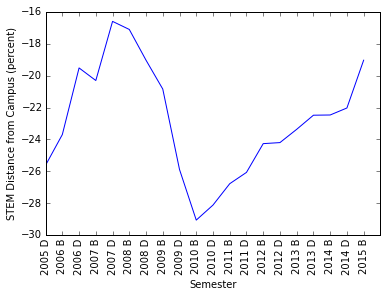

In [90]:
plt.plot(vals)
plt.ylabel('STEM Distance from Campus (percent)')
plt.xlabel('Semester')
p = plt.xticks(ticks, labels, rotation='vertical')

hello


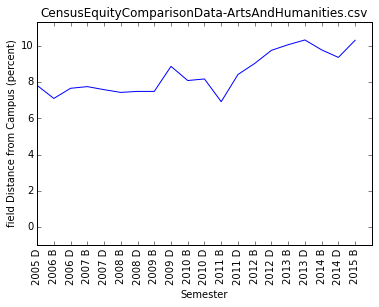

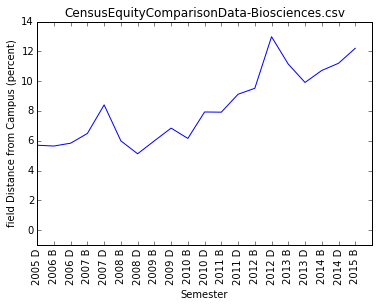

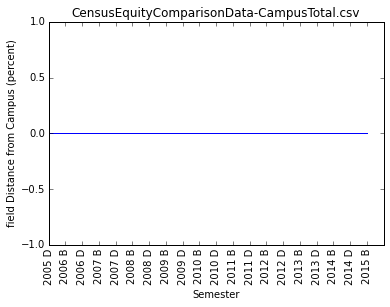

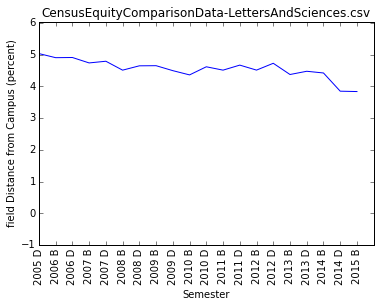

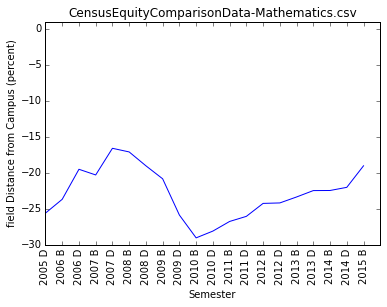

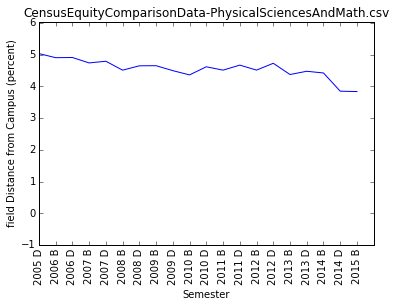

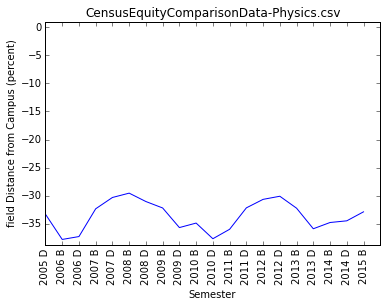

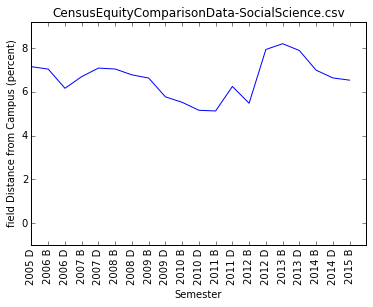

In [103]:
folder = 'data'
baseline = 'CensusEquityComparisonData-CampusTotal.csv'
df_baseline = pd.read_csv(os.path.join(folder, baseline))

for file in dirs:
    filename = file
    df = pd.read_csv(os.path.join(folder, filename))

    cols = df.columns

    semesters = list(set(df[cols[1]]))
    genders = list(set(df[cols[3]]))

    campus_vs_field = {} # dictionary for data
    for semester in semesters:
        data = headcount_percent(df, semester, cols[3], genders)
        baseline = headcount_percent(df_baseline, semester, cols[3], genders)
        campus_vs_field[semester] = distance(data, baseline)

    labels = sorted(campus_vs_field.keys())
    vals = [campus_vs_field[key] for key in labels]
    ticks = range(len(labels))

    plt.figure()
    plt.plot(vals)
    if min(vals) >= 0:
        minlim = -1
    else: 
        minlim = min(vals) -1
    if max(vals) <= 0:
        maxlim = 1
    else:
        maxlim = max(vals) +1
    plt.ylim([minlim,maxlim])
    plt.title(file)
    plt.ylabel('field Distance from Campus (percent)')
    plt.xlabel('Semester')
    p = plt.xticks(ticks, labels, rotation='vertical')
    
print "hello"